<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/team%2012/Assignment_Pandas_GroupMeow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: **Capacity and utilisation of Intensive Care Unit (ICU) beds during COVID-19**

### Group Members: 
*   MADINA SURAYA BINTI ZHARIN (A20EC0203)
*   ADRINA ASYIQIN BINTI MD ADHA (A20EC0174)


One of the challenges that the Ministry of Health suffer during the peak season of COVID-19 was managing the Intensive Care Unit (ICU) for critical patients. They always need to make sure that the capacity and the utilisation of ICU were enough. This dataset was found from the MoH (Ministry of Health Malaysia) official Github account which presently focused on COVID-19 data, in collaboration with the COVID-19 Immunisation Task Force.

This dataset contains 15656 records and 16 columns which are:
1. **date:** yyyy-mm-dd format; data correct as of 2359hrs on that date
2. **state:**name of state, with similar 
qualification on exhaustiveness of 
date-state combos as PKRC data
3. **beds_icu_total**: total critical care beds available (with related medical infrastructure)
4. **beds_icu_covid**: total critical care beds dedicated for COVID-19
5. **vent**: total available ventilators
6. **vent_port**: total available portable ventilators
7. **icu_x**: total number of individuals in category x under intensive care, where x can be suspected/probable(**icu_pui**), COVID-19 positive(**icu_covid**), or non-COVID(**icu_noncovid**); this is a stock variable
8. **vent_x**: total number of individuals in category x on mechanical ventilation, where x can be suspected/probable(**vent_pui**), COVID-19 positive (**vent_covid**), or non-COVID(**vent_noncovid**); this is a stock variable




## Downloading the Dataset



Below are the libraries used for this EDA. Some of it are for basic python such as pandas and numpy and also visualisation libraries which are seaborn and matplotlib.

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np

Next, we load the dataset by firstly, store it in our github account and then copy the link and paste here. There is only one file of dataset we use which is in csv form.

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
#Loading data from a cvs file
data = pd.read_csv('https://raw.githubusercontent.com/madinasuraya/EDA/main/icu.csv')

In [ ]:
data.head()

,date,state,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
0,2020-03-24,Johor,10,22,32,10,11,2,0,0,1,0,0,0,8,0
1,2020-03-24,Kedah,35,0,35,16,34,0,2,1,12,1,1,0,19,0
2,2020-03-24,Kelantan,39,0,39,20,42,4,1,0,20,1,0,0,26,0
3,2020-03-24,Melaka,26,0,26,12,23,4,0,2,12,0,1,0,13,5
4,2020-03-24,Negeri Sembilan,18,0,18,10,14,9,0,0,8,0,0,0,1,6


In [ ]:
data.tail()

,date,state,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
15650,2022-12-21,Selangor,136,6,142,24,465,14,3,0,111,1,0,75,161,17
15651,2022-12-21,Terengganu,40,1,41,7,66,40,1,0,29,1,0,23,28,18
15652,2022-12-21,W.P. Kuala Lumpur,30,16,46,4,92,0,3,0,28,2,0,21,26,0
15653,2022-12-21,W.P. Labuan,5,7,12,7,22,12,0,0,1,0,0,0,0,0
15654,2022-12-21,W.P. Putrajaya,14,0,14,3,37,0,0,0,9,0,0,6,6,0


The dataset has been downloaded and extracted.

Next step, observe the data type of each fields.

In [ ]:
data.dtypes

date              object
state             object
beds_icu           int64
beds_icu_rep       int64
beds_icu_total     int64
beds_icu_covid     int64
vent               int64
vent_port          int64
icu_covid          int64
icu_pui            int64
icu_noncovid       int64
vent_covid         int64
vent_pui           int64
vent_noncovid      int64
vent_used          int64
vent_port_used     int64
dtype: object

## Data Preparation and Cleaning




Drop some columns that will not be use.

In [ ]:
columns = ['beds_icu', 'beds_icu_rep', 'vent_used', 'vent_port_used']
data.drop(columns, inplace=True, axis=1)

In [ ]:
data.head()

,date,state,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid
0,2020-03-24,Johor,32,10,11,2,0,0,1,0,0,0
1,2020-03-24,Kedah,35,16,34,0,2,1,12,1,1,0
2,2020-03-24,Kelantan,39,20,42,4,1,0,20,1,0,0
3,2020-03-24,Melaka,26,12,23,4,0,2,12,0,1,0
4,2020-03-24,Negeri Sembilan,18,10,14,9,0,0,8,0,0,0


In [ ]:
data.tail()

,date,state,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid
15650,2022-12-21,Selangor,142,24,465,14,3,0,111,1,0,75
15651,2022-12-21,Terengganu,41,7,66,40,1,0,29,1,0,23
15652,2022-12-21,W.P. Kuala Lumpur,46,4,92,0,3,0,28,2,0,21
15653,2022-12-21,W.P. Labuan,12,7,22,12,0,0,1,0,0,0
15654,2022-12-21,W.P. Putrajaya,14,3,37,0,0,0,9,0,0,6


Get the shape or number of columns and rows of the data.

In [ ]:
data.shape

(15655, 12)

Now, we see if there are any duplicated rows.

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 12)


In [ ]:
data.count()

date              15655
state             15655
beds_icu_total    15655
beds_icu_covid    15655
vent              15655
vent_port         15655
icu_covid         15655
icu_pui           15655
icu_noncovid      15655
vent_covid        15655
vent_pui          15655
vent_noncovid     15655
dtype: int64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.count()

date              15655
state             15655
beds_icu_total    15655
beds_icu_covid    15655
vent              15655
vent_port         15655
icu_covid         15655
icu_pui           15655
icu_noncovid      15655
vent_covid        15655
vent_pui          15655
vent_noncovid     15655
dtype: int64

As we can see, there are no duplicated data.

Since the date are in object/string type, we now convert it into datetime type.

In [ ]:
data['date']= pd.to_datetime(data['date'])

In [ ]:
data.dtypes

date              datetime64[ns]
state                     object
beds_icu_total             int64
beds_icu_covid             int64
vent                       int64
vent_port                  int64
icu_covid                  int64
icu_pui                    int64
icu_noncovid               int64
vent_covid                 int64
vent_pui                   int64
vent_noncovid              int64
dtype: object

Now, we identify if there are any rows with missing values in date and state columns. If so, we drop it.

In [ ]:
data = data.dropna(subset=['date', 'state'])

In [ ]:
data.count()

date              15655
state             15655
beds_icu_total    15655
beds_icu_covid    15655
vent              15655
vent_port         15655
icu_covid         15655
icu_pui           15655
icu_noncovid      15655
vent_covid        15655
vent_pui          15655
vent_noncovid     15655
dtype: int64

As we can see, there are no missing values in date and state columns.

Now, we identify the unique value from date and state columns.

In [ ]:
data['date'].unique()

array(['2020-03-24T00:00:00.000000000', '2020-03-25T00:00:00.000000000',
       '2020-03-26T00:00:00.000000000', ...,
       '2022-12-19T00:00:00.000000000', '2022-12-20T00:00:00.000000000',
       '2022-12-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
data['state'].unique()

array(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan',
       'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak',
       'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan',
       'W.P. Putrajaya'], dtype=object)

## Exploratory Analysis and Visualization




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Descriptive Statistics**

In [ ]:
data.describe()

,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid
count,15655.000000,15655.000000,15655.000000,15655.000000,15655.000000,15655.000000,15655.000000,15655.000000,15655.000000,15655.000000
mean,84.886362,45.149026,110.632322,30.391696,20.380006,0.369467,33.680166,11.090323,0.175088,14.952411
std,61.245274,46.151837,92.150185,30.094114,42.013500,3.125081,24.498955,24.564109,0.813875,19.706301
min,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,12.000000,47.000000,8.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000
50%,73.000000,30.000000,92.000000,22.000000,5.000000,0.000000,30.000000,3.000000,0.000000,3.000000
75%,120.000000,65.000000,161.000000,44.000000,21.000000,0.000000,48.000000,11.000000,0.000000,26.000000
max,455.000000,380.000000,534.000000,196.000000,532.000000,80.000000,135.000000,294.000000,41.000000,139.000000


Based on the descriptive statistics above, there are a total of 15655 records for each numerical fields. The **mean** value of the total number of ventilator available (vent) recorded the highest followed by the total amount of icu's bed available (beds_icu_total). Next, the data are more spread out since the value of **standard deviation** are high. Moreover, beds_icu_total and vent are always available considering the **minimum** value of 5. Lastly, the **maximum** amount of covid patient who stay in the icu in a particular date in 532.

**Histogram**

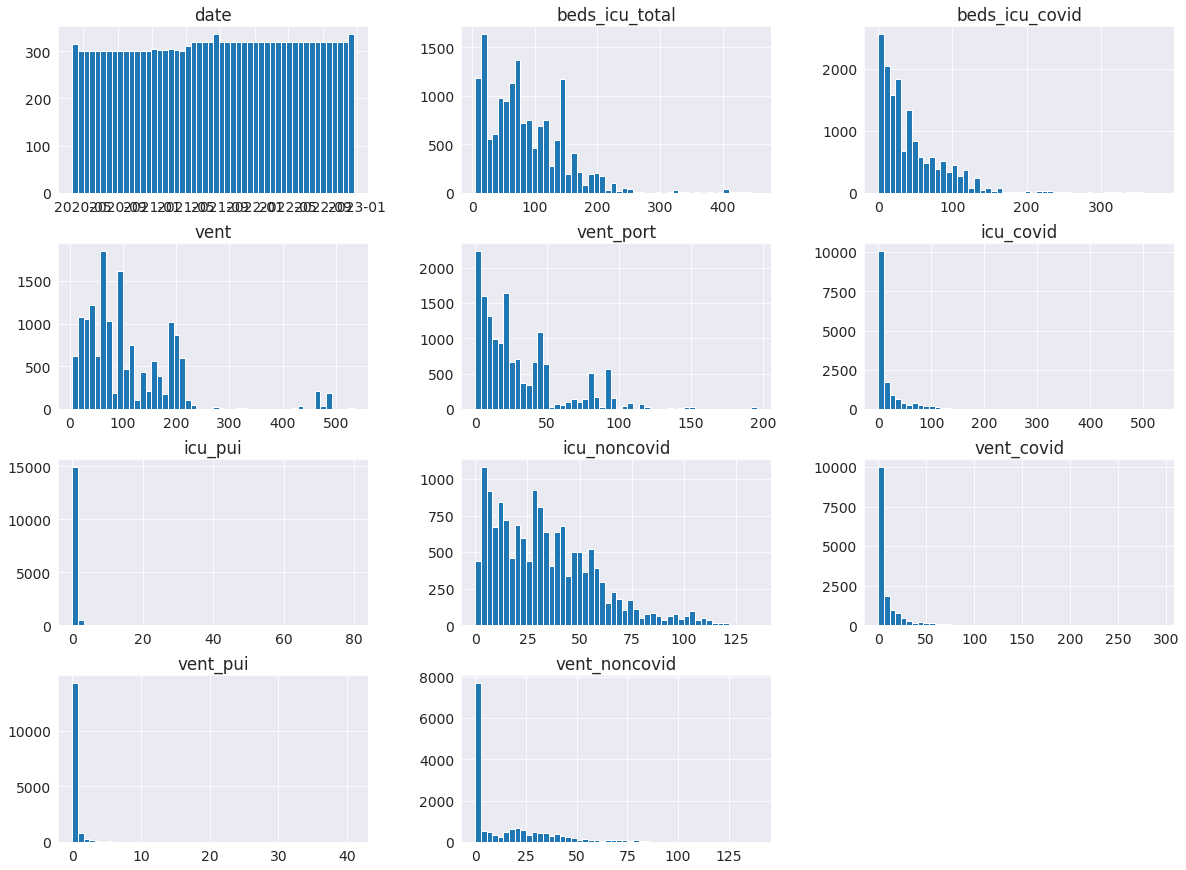

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

From above histograms, we can see that there are a record where the total number of beds in the icu (beds_icu_total) reached 400. There are also some records shows that the amount of icu beds dedicated for covid patients (beds_icu_covid) reached 240. Next, if we combine the number of ventilator (vent) and portable ventilator (vent_port) there are almost 700 of it available in certain records.

Moreover, the amount of covid patients who stays in the icu (icu_covid) and requires ventilator (vent_covid) reached 120 and 70 respectively. However, person under investigation (x_pui) does not depend much on icu and ventilators.After that, we can see that majority of non-covid patients used more beds and ventilators rather than covid patients.

Generally, we get to see that the above utilities available were actually enough for all covid, non-covid and person under investigation. However, there might be some day and state where the total amount needed are more than the amount of available.

**Boxplot**

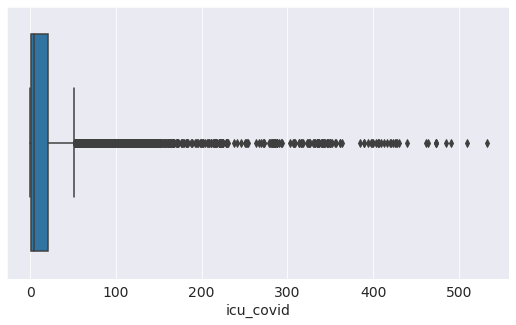

In [ ]:
sns.boxplot(x=data['icu_covid'])

There are lots of outlier show, as the number of covid patient in the icu are varied. We can conclude that most of the covid patient who stays in the icu were not that much considering the peak and non-peak season of covid-19.

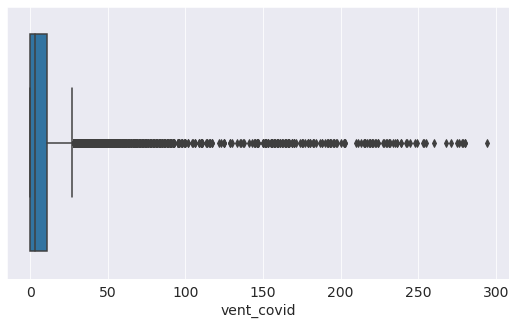

In [ ]:
sns.boxplot(x=data['vent_covid'])

Same goes to the amount of covid patient who use ventilator. The number are varied hence, lots of outliers.

**Heatmap** 

,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid
beds_icu_total,1.000000,0.866520,0.756526,0.557351,0.706782,0.352768,0.633814,0.672743,0.246536,0.495218
beds_icu_covid,0.866520,1.000000,0.523890,0.517336,0.801719,0.415003,0.275825,0.753607,0.293210,0.215005
vent,0.756526,0.523890,1.000000,0.236281,0.369157,0.209039,0.749397,0.370120,0.084821,0.660859
vent_port,0.557351,0.517336,0.236281,1.000000,0.556849,0.304705,0.260139,0.551177,0.298532,0.099029
icu_covid,0.706782,0.801719,0.369157,0.556849,1.000000,0.496913,0.077511,0.966285,0.352052,0.067504
icu_pui,0.352768,0.415003,0.209039,0.304705,0.496913,1.000000,0.006380,0.498856,0.392173,0.010719
icu_noncovid,0.633814,0.275825,0.749397,0.260139,0.077511,0.006380,1.000000,0.079276,-0.034997,0.754008
vent_covid,0.672743,0.753607,0.370120,0.551177,0.966285,0.498856,0.079276,1.000000,0.320407,0.074672
vent_pui,0.246536,0.293210,0.084821,0.298532,0.352052,0.392173,-0.034997,0.320407,1.000000,-0.112590
vent_noncovid,0.495218,0.215005,0.660859,0.099029,0.067504,0.010719,0.754008,0.074672,-0.112590,1.000000


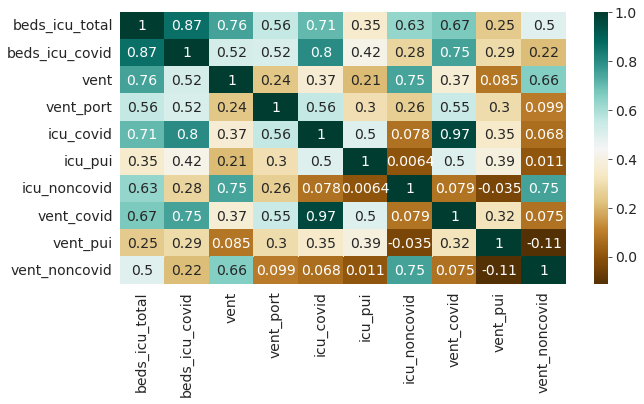

In [ ]:
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

From the heatmap above, data that collerate the most are vent_covid and icu_covid as most patient who use the ventilators are the covid patient who stay in the icu. Next, we can see that beds_icu_covid depends much on the beds_icu_total. Other than that shows that there are not much correlation between them especially those with value less thatn 0.5.

**Scatterplot** 

In [ ]:
data['month'] = pd.DatetimeIndex(data['date']).month
data['year'] = pd.DatetimeIndex(data['date']).year
data['month_year'] = pd.DatetimeIndex(data['date']).to_period('M')
data = data[['date','month','year','month_year','state','beds_icu_total','beds_icu_covid',	'vent','vent_port','icu_covid','icu_pui','icu_noncovid','vent_covid','vent_pui','vent_noncovid']]
data

,date,month,year,month_year,state,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid
0,2020-03-24,3,2020,2020-03,Johor,32,10,11,2,0,0,1,0,0,0
1,2020-03-24,3,2020,2020-03,Kedah,35,16,34,0,2,1,12,1,1,0
2,2020-03-24,3,2020,2020-03,Kelantan,39,20,42,4,1,0,20,1,0,0
3,2020-03-24,3,2020,2020-03,Melaka,26,12,23,4,0,2,12,0,1,0
4,2020-03-24,3,2020,2020-03,Negeri Sembilan,18,10,14,9,0,0,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15650,2022-12-21,12,2022,2022-12,Selangor,142,24,465,14,3,0,111,1,0,75
15651,2022-12-21,12,2022,2022-12,Terengganu,41,7,66,40,1,0,29,1,0,23
15652,2022-12-21,12,2022,2022-12,W.P. Kuala Lumpur,46,4,92,0,3,0,28,2,0,21
15653,2022-12-21,12,2022,2022-12,W.P. Labuan,12,7,22,12,0,0,1,0,0,0


In [ ]:
data['month_year'] = data['month_year'].astype(str)
data['month_year'] = pd.to_datetime(data['month_year'])
data.dtypes

date              datetime64[ns]
month                      int64
year                       int64
month_year        datetime64[ns]
state                     object
beds_icu_total             int64
beds_icu_covid             int64
vent                       int64
vent_port                  int64
icu_covid                  int64
icu_pui                    int64
icu_noncovid               int64
vent_covid                 int64
vent_pui                   int64
vent_noncovid              int64
dtype: object

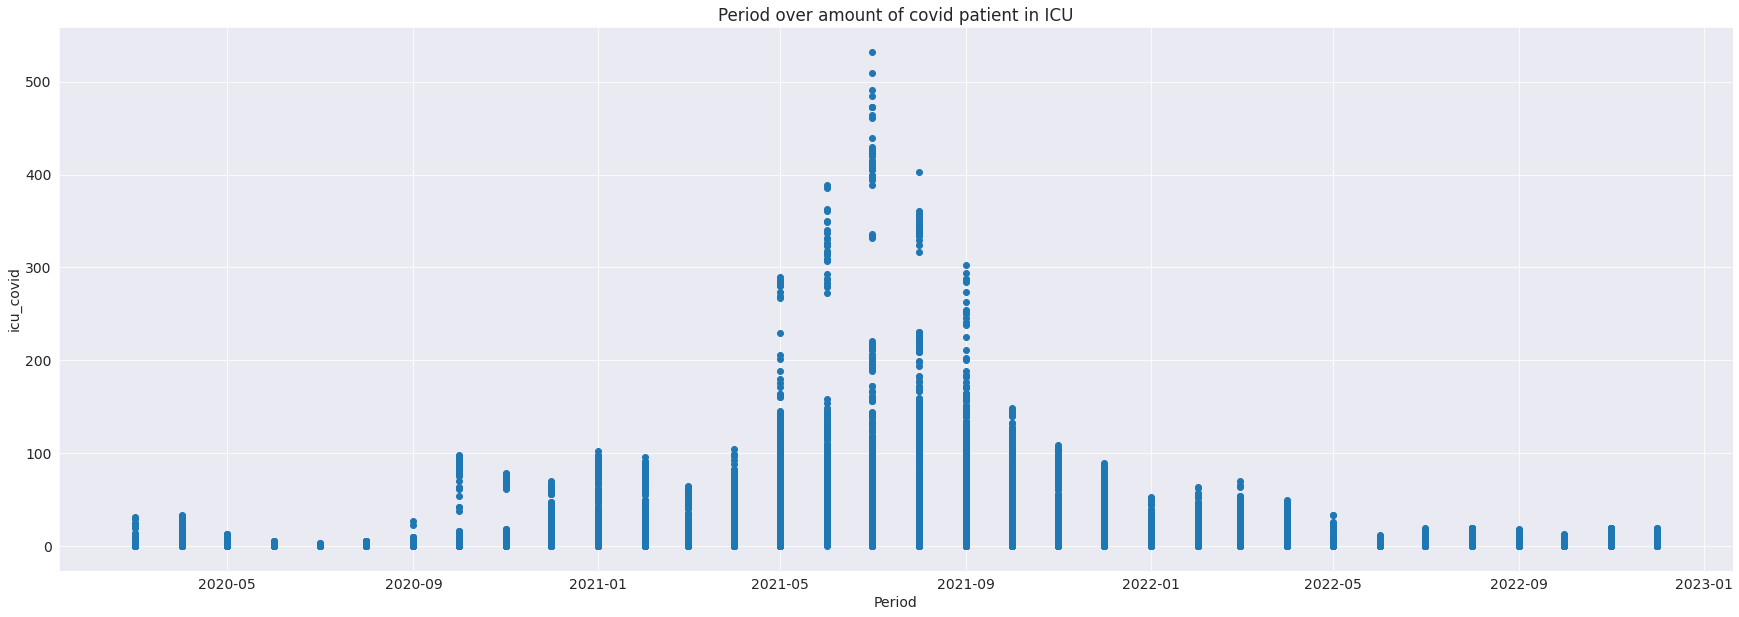

In [ ]:
plt.figure(figsize=(30,10))
plt.title("Period over amount of covid patient in ICU")
plt.ylabel('icu_covid')
plt.xlabel('Period');
plt.plot_date(data['month_year'], data['icu_covid'])

In mid 2021, the scatter plot shows the highest amount of covid-19 patient in ICU. Thus, we can conclude that the peak season of covid-19 falls under this period.

## Asking and Answering Questions



#### Q1: Does the amount of ventilator used by covid patient were the highest during the peak season of covid-19?

In [ ]:
max_vent = data.groupby(by="month_year")["vent_covid"].sum()
max_vent.sort_values(ascending=False)

month_year
2021-08-01    26959
2021-07-01    22827
2021-09-01    20103
2021-06-01    18069
2021-05-01    13073
2021-10-01    11360
2021-11-01     8104
2021-12-01     6472
2022-03-01     6425
2021-02-01     4882
2021-01-01     4574
2021-04-01     4323
2022-02-01     3374
2021-03-01     3102
2022-01-01     2924
2022-04-01     2703
2020-12-01     2210
2022-11-01     1628
2020-11-01     1334
2022-08-01     1290
2022-09-01     1111
2022-12-01     1000
2022-07-01      937
2020-04-01      924
2022-05-01      899
2020-10-01      887
2022-10-01      726
2022-06-01      516
2020-03-01      422
2020-05-01      199
2020-09-01      128
2020-08-01       79
2020-07-01       37
2020-06-01       18
Name: vent_covid, dtype: int64

We know that the peak season of covid-19 falls between July to September 2021 and based on this, we wanted to prove if there is also an increasing amount of ventilator used during the season. Thus, we use pandas by finding the sum of vent_covid and group it by year and month. To easily see the result, we sort it.

**Ans1:** Yes, the amount of ventilators used by covid patients are the highest during the peak season of covid-19 which is 26959 ventilators in August 2021.

#### Q2: Which state provides the most amount of ICU bed?

In [ ]:
max_icu = data.groupby(by="state")["beds_icu_total"].sum()
max_icu.sort_values(ascending=False)

state
Selangor             186809
Sabah                138427
Sarawak              128918
Kelantan             124687
Johor                112438
W.P. Kuala Lumpur    108799
Perak                 90395
Kedah                 82854
Pahang                80900
Melaka                76413
Pulau Pinang          62995
Negeri Sembilan       55356
Terengganu            39911
Perlis                16515
W.P. Putrajaya        12368
W.P. Labuan           11111
Name: beds_icu_total, dtype: int64

We also wanted to know what state provides the most amount of bed in the ICU. To do this, we sum up the total ICU beds by grouping them into state. Lastly, sort the value decreasingly to see the results.

**Ans2:** Selangor provides the most ICU beds. It is a state on the west coast of Peninsular Malaysia, encircling the capital Kuala Lumpur hence, the amount of population is high since most offices are located here.

#### Q3: Is there any strong correlation between the ICU and ventilator used by the covid patient?

In [ ]:
num_data = data[['beds_icu_total','beds_icu_covid',	'vent','vent_port','icu_covid','icu_pui','icu_noncovid','vent_covid','vent_pui','vent_noncovid']]
num_data

,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid
0,32,10,11,2,0,0,1,0,0,0
1,35,16,34,0,2,1,12,1,1,0
2,39,20,42,4,1,0,20,1,0,0
3,26,12,23,4,0,2,12,0,1,0
4,18,10,14,9,0,0,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15650,142,24,465,14,3,0,111,1,0,75
15651,41,7,66,40,1,0,29,1,0,23
15652,46,4,92,0,3,0,28,2,0,21
15653,12,7,22,12,0,0,1,0,0,0


,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid
beds_icu_total,1.000000,0.866520,0.756526,0.557351,0.706782,0.352768,0.633814,0.672743,0.246536,0.495218
beds_icu_covid,0.866520,1.000000,0.523890,0.517336,0.801719,0.415003,0.275825,0.753607,0.293210,0.215005
vent,0.756526,0.523890,1.000000,0.236281,0.369157,0.209039,0.749397,0.370120,0.084821,0.660859
vent_port,0.557351,0.517336,0.236281,1.000000,0.556849,0.304705,0.260139,0.551177,0.298532,0.099029
icu_covid,0.706782,0.801719,0.369157,0.556849,1.000000,0.496913,0.077511,0.966285,0.352052,0.067504
icu_pui,0.352768,0.415003,0.209039,0.304705,0.496913,1.000000,0.006380,0.498856,0.392173,0.010719
icu_noncovid,0.633814,0.275825,0.749397,0.260139,0.077511,0.006380,1.000000,0.079276,-0.034997,0.754008
vent_covid,0.672743,0.753607,0.370120,0.551177,0.966285,0.498856,0.079276,1.000000,0.320407,0.074672
vent_pui,0.246536,0.293210,0.084821,0.298532,0.352052,0.392173,-0.034997,0.320407,1.000000,-0.112590
vent_noncovid,0.495218,0.215005,0.660859,0.099029,0.067504,0.010719,0.754008,0.074672,-0.112590,1.000000


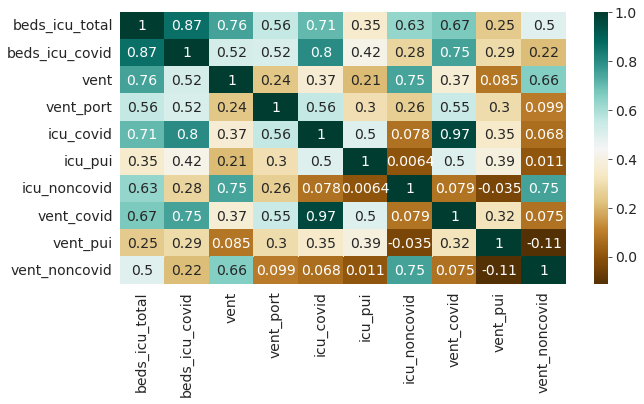

In [ ]:
plt.figure(figsize=(10,5))
c= num_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Ventilator is a machine that helps lungs to work. Covid patients who have difficulties breathing with a critical condition will be placed inside the ICU and some of them require a ventilator to breathe normally. As we know, Covid-19 attacks the lungs. Thus, we build a heatmap to see if there is any strong correlation between the numerical value of the ICU and ventilator used.

**Ans3:** The highest correlation recorded here is 0.97 which is vent_covid vs icu_covid. Thus, we can conclude that covid patients who stay in the ICU are someone who are truly in a critical condition hence, using the ventilator will help them to breath.

#### Q4: List out the percentage of covid-19 patients in ICU every year

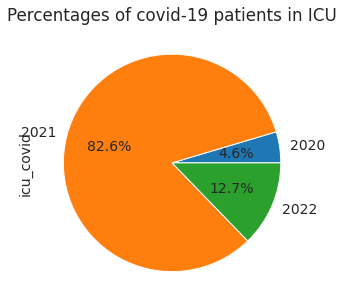

In [ ]:
patients = data.groupby(by="year")["icu_covid"].sum()
patients

plt.title('Percentages of covid-19 patients in ICU')
patients.plot.pie(autopct="%.1f%%")

In [ ]:
patients

year
2020     14736
2021    263646
2022     40667
Name: icu_covid, dtype: int64

In the year 2021, it has the largest patients in ICU. Meanwhile, 2022 only has 12.7% which is significantly less then the previous year. In 2020, the disease had just began to spread and rise hence the low in percentage.

#### Q5: List the values for Sabah

In [ ]:
sabah_covid = pd.DataFrame(data.groupby("state")['beds_icu_covid','icu_covid','vent_covid'].sum() )
sabah_covid 


<ipython-input-70-ec98ceb7b470>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sabah_covid = pd.DataFrame(data.groupby("state")['beds_icu_covid','icu_covid','vent_covid'].sum() )


,beds_icu_covid,icu_covid,vent_covid
state,,,
Johor,54426,29397,21246
Kedah,54145,22664,10144
Kelantan,41133,16150,8824
Melaka,28742,14460,4843
Negeri Sembilan,31026,12204,7753
Pahang,46765,10137,6195
Perak,49555,20166,12280
Perlis,8094,1698,795
Pulau Pinang,28693,15975,8944


To filter the dataset for Sabah, click on the interactive table and filter the State to Sabah. All the values will be displayed in the output box. 

## Inferences and Conclusion



Based on the previous analysis, it is known that Selangor takes the highest spot on treating covid-19 patients because it has the most ventilators and icu beds allocated for them. Along the years, Selangor had an increasing trend where patients of covid-19 increases every year. 

2020-06-01 
During this date, it has the least amount of ventilators used. This could be becuse the covid-19 disease had just started to spread and the patients is among the earliest to catch the disease.       

We can also observe in 2021, it has the highest percentage of covid-19 patients cumulative with all states. Then 2022 the percentage decrease drasctically. It is best to assume the effectiveness of the vaccines that was mandatory then.  

Based on the analysis, it is known that Perlis has the least amount of ventilation for COVID-19 patientsThis is due to the amount of residence in Perlis which is small compared to other states.

It is also noticeably shown that Perlis is among the top of the states with the least amount ICU for COVID-19 patients.

In opposition. Selangor takes place with the highest amount of ICU and ventilation for COVID-19 patients. This could be resulted by the incredibaly large amount of people getting positive covid in that state.

## References and Future Work



https://stephenallwright.com/pandas-groupby-sum-another-column/

https://realpython.com/

https://github.com/MoH-Malaysia/covid19-public

https://cmdlinetips.com/